In [ ]:
# DATA SET CANCER DE MAMA https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [25]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
# from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data_total.txt')
df.drop(['id'], 1, inplace=True)

df.replace('?',-99999, inplace=True)
for col in df.columns:
    df = df[df[col] != -99999]

labels = {'benign': 2, 'malignant': 4}

In [4]:
df.head()

,Clump_Thickness,Unifom_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
print(df.columns)

Index([u'Clump_Thickness', u'Unifom_Cell_Size', u'Uniform_Cell_Shape',
       u'Marginal_Adhesion', u'Single_Epithelial_Cell_Size', u'Bare_Nuclei',
       u'Bland_Chromatin', u'Normal_Nucleoli', u'Mitoses', u'Class'],
      dtype='object')


In [ ]:
#print(df.values)

In [ ]:
#print(df.describe)

In [ ]:
#df['Class']

In [ ]:
#df[0:2]

In [116]:
#df.iloc[2]

Clump_Thickness                3
Unifom_Cell_Size               1
Uniform_Cell_Shape             1
Marginal_Adhesion              1
Single_Epithelial_Cell_Size    2
Bare_Nuclei                    2
Bland_Chromatin                3
Normal_Nucleoli                1
Mitoses                        1
Class                          2
Name: 2, dtype: object

In [ ]:
# Ponemos condiciones así
#df[df.Class > 3]

In [2]:
# CLASIFICADOR montamos los arrays de NUMPY
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = np.array(df.drop(['Class'], 1), dtype=int)
y = np.array(df['Class'], dtype=int)

Xn = np.apply_along_axis(scaler.fit_transform,0,X)
yn = np.apply_along_axis(scaler.fit_transform,0,y)

C:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\sklearn\utils\validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int32
  "got %s" % (estimator, X.dtype))


### VARIOS CLASIFICADORES CON CROSSFOLDER 

In [3]:
# -VARIOS CLASIFICADORES SVC, RF, KNN, LOG_REG ----------------------------

from sklearn.cross_validation import KFold

#  definimos la funcion de cross validation
def run_cv(X,y,clf_class,**kwargs):
    # Construimos el objeto kfolds 
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # tenemos  que iterar sobre todos los kfolds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        
        # Iniciamos el clasificador con los keywords arguments...
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LOG_REG

from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix

lbls = {v: l for l, v in enumerate(np.unique(yn))}
actual_values = [lbls[v] for v in yn]

# ------- CONFIANZA, RECALL, PRECISION, ETC. ---------------
print "--------  Confianzas de los calsificadores: \n \n "
pred_SVC = run_cv(Xn,yn,SVC)
pred_SVC = [lbls[v] for v in pred_SVC]
print "Confianza de SVC = ", accuracy(actual_values, pred_SVC)
print "MATRIZ DE CONFUSION de SVC \n", confusion_matrix(actual_values, pred_SVC), "\n"

pred_KNN = run_cv(Xn,yn,KNN)
pred_KNN = [lbls[v] for v in pred_KNN]
print "Confianza de KNN = ", accuracy(actual_values, pred_KNN)
print "MATRIZ DE CONFUSION de KNN \n", confusion_matrix(actual_values, pred_KNN), "\n"

pred_LOG_REG = run_cv(Xn,yn,LOG_REG)
pred_LOG_REG = [lbls[v] for v in pred_LOG_REG]
print "Confianza de  Log. Regression = ", accuracy(actual_values, pred_LOG_REG)
print "MATRIZ DE CONFUSION de Log. Regression \n", confusion_matrix(actual_values, pred_LOG_REG), "\n"

#print "%.3f" % accuracy(y, run_cv(X,y,RF))
pred_RF = run_cv(Xn,yn,RF)
pred_RF = [lbls[v] for v in pred_RF]
print "Confianza de Random forest:", accuracy(actual_values, pred_RF)
print "MATRIZ DE CONFUSION de RANDOM FOREST \n", confusion_matrix(actual_values, pred_RF), "\n"

--------  Confianzas de los calsificadores: 
 
 
Confianza de SVC =  0.96925329429
MATRIZ DE CONFUSION de SVC 
[[431  13]
 [  8 231]] 

Confianza de KNN =  0.967789165447
MATRIZ DE CONFUSION de KNN 
[[432  12]
 [ 10 229]] 

Confianza de  Log. Regression =  0.96925329429
MATRIZ DE CONFUSION de Log. Regression 
[[435   9]
 [ 12 227]] 

Confianza de Random forest: 0.959004392387
MATRIZ DE CONFUSION de RANDOM FOREST 
[[433  11]
 [ 17 222]] 



### Calculamos los limites de los SLIDES de BOKEH para que estén derentro del margen de los valores del data set

In [6]:
print np.amin(X,axis=0)
print np.amax(X,axis=0)

[1 1 1 1 1 1 1 1 1]
[10 10 10 10 10 10 10 10 10]


# Ahora calculamos los puntos cercanos a un punto dado para calcular donde están mas proximas los puntos de categoria diferente, (cancerosas). Esto nos ayudará a seleccionar las direcciones más relevantes a la hora de estudiar la evolución del punto en cuestión.
##UTLIZAMOS UN EJEMPLO SENCILLO DE DATAFRAME EN SU LUGAR

In [24]:
print X[y==labels['benign']].shape
print X[y==labels['malignant']].shape

(444L, 9L)
(239L, 9L)


In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def estimate_prognosis_weight_vector(cell, malignants, c_min=2, c_max=20, metric='euclidean'):
    
    # K-Means Cluster search on malignant cells
    silh = []
    km_model = [0] * c_max
    for t in range(2,20):
        km_model[t-c_min] = KMeans(n_clusters=t).fit(malignants)
        silh.append(silhouette_score(malignants, km_model[t-c_min].labels_, metric=metric))

    idx = np.argmax(silh)
    n_clusters = idx + c_min
    cluster_lbl = km_model[idx].labels_
    
    # Cluster centroid retrieval and distance calculation
    distance, centroid = {}, {}
    for each in np.unique(cluster_lbl).tolist():
        centroid[each] = np.mean(malignants[cluster_lbl==each],0)
        distance[each] = np.sqrt(np.sum(np.power(centroid[each] - cell,2)))
    
    dist_v = {k: np.abs(centroid[k] - cell) for k, v in enumerate(distance.values())}[np.argmin(distance.values())]
    
    inv_dist = 1 / dist_v
    
    weights = inv_dist / np.sum(inv_dist)
    
    return weights

In [23]:
weights = estimate_prognosis_weight_vector([5, 5, 5, 5, 5, 5, 5, 5, 5], X[y==labels['malignant']])
weights

array([ 0.02879991,  0.11222035,  0.2503377 ,  0.08452961,  0.05249016,
        0.02046786,  0.38286942,  0.04930894,  0.01897604])

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(X)
Xt = pca.transform(X)

In [60]:
X[:3,:]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1]])

In [67]:
np.apply_along_axis(np.argsort,1,X[:3,:])[:,-3:]

array([[4, 6, 0],
       [3, 4, 5],
       [5, 0, 6]], dtype=int64)

In [52]:
Xt[0,:]

array([ 4.48210124,  0.02402875,  1.71843301])

In [57]:
pca.components_

array([[-0.29673594, -0.40397078, -0.39275858, -0.33120206, -0.24973971,
        -0.44261342, -0.29207832, -0.35453582, -0.12457632],
       [-0.07350393,  0.22992973,  0.16470172, -0.09819925,  0.20021568,
        -0.78057021,  0.00847929,  0.46919277,  0.18806882],
       [ 0.85200918,  0.02627262,  0.07445372, -0.47385803, -0.03165671,
        -0.09341554, -0.12241225, -0.13372444, -0.02663195]], dtype=float32)

In [83]:
for i in np.array([(r, a) for r, ar in enumerate(comps) for a in ar]):
    print pca.components_[tuple(i)]

-0.392759
-0.403971
-0.442613
0.22993
0.469193
-0.78057
-0.133724
-0.473858
0.852009


In [74]:
pca.components_[0,5]

-0.44261342

In [90]:
comps = np.apply_along_axis(np.argsort,1,np.abs(pca.components_))[:,-3:]
indexes = np.array([(r, a) for r, ar in enumerate(comps) for a in ar])
np.reshape(pca.components_[indexes[:,0], indexes[:,1]],(3,-1))

array([[-0.39275858, -0.40397078, -0.44261342],
       [ 0.22992973,  0.46919277, -0.78057021],
       [-0.13372444, -0.47385803,  0.85200918]], dtype=float32)

In [95]:
np.sum(pca.components_*X[0,:],1)

array([-4.90905105,  0.23147317,  3.20259212])

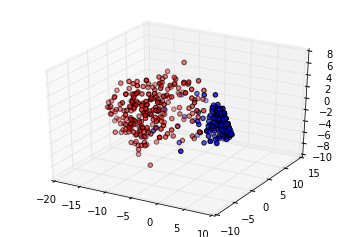

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs1 = Xt[y==labels['benign']][:,0]
ys1 = Xt[y==labels['benign']][:,1]
zs1 = Xt[y==labels['benign']][:,2]

xs2 = Xt[y==labels['malignant']][:,0]
ys2 = Xt[y==labels['malignant']][:,1]
zs2 = Xt[y==labels['malignant']][:,2]

ax.scatter(xs=xs1,ys=ys1,zs=zs1,c=[[0,0,1,0.8]])
ax.scatter(xs=xs2,ys=ys2,zs=zs2,c=[[1,0,0,0.8]])

plt.show()

In [19]:
## Esto posiblemente ya no sirva...
classes = {}
for each in np.unique(y).tolist():
    classes[each] = X[y==each]

benign = classes[labels['benign']]
malignant = classes[labels['malignant']]

b_dims = benign.shape
m_dims = malignant.shape

benign = np.reshape(benign, b_dims + (1,))
malignant = np.reshape(malignant, m_dims + (1,))

np.tile(benign, [1, 1, m_dims[0]]) - 

{2: array([[5, 1, 1, ..., 3, 1, 1],
        [5, 4, 4, ..., 3, 2, 1],
        [3, 1, 1, ..., 3, 1, 1],
        ..., 
        [3, 1, 1, ..., 2, 1, 2],
        [3, 1, 1, ..., 1, 1, 1],
        [2, 1, 1, ..., 1, 1, 1]]), 4: array([[ 8, 10, 10, ...,  9,  7,  1],
        [ 5,  3,  3, ...,  4,  4,  1],
        [ 8,  7,  5, ...,  5,  5,  4],
        ..., 
        [ 5, 10, 10, ...,  8, 10,  2],
        [ 4,  8,  6, ..., 10,  6,  1],
        [ 4,  8,  8, ..., 10,  4,  1]])}

# PREDICCIONES CON INPUTS

In [ ]:
# vamos a hacer predicciones :

example_measures = np.array([[10,5,5,3,6,7,7,10,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

In [50]:
print(df.values)

[[5L 1L 1L ..., 1L 1L 2L]
 [5L 4L 4L ..., 2L 1L 2L]
 [3L 1L 1L ..., 1L 1L 2L]
 ..., 
 [5L 10L 10L ..., 10L 2L 4L]
 [4L 8L 6L ..., 6L 1L 4L]
 [4L 8L 8L ..., 4L 1L 4L]]


# 2 PARTE: gráficas-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# condiciones que definen nuevos datasets
df_tumoral = df[df.Class > 3]
df_NO_tumoral = df[df.Class < 3]

df_tumoral.head()

In [ ]:
# graficas scattered 
import matplotlib.pyplot as plt
#scattercols = ['price','accommodates', 'number_of_reviews', 'reviews_per_month', 'beds', 'availability_30', 'review_scores_rating']
scattercols = df.columns
axs = pd.scatter_matrix(df[scattercols],
                        figsize=(12, 12), c='red')

plt.figure(figsize=(1920,1080))
plt.show()

In [ ]:
# definimos una funcion distancia de un registro del data se

In [ ]:
df_NO_tumoral.head()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = df_tumoral.Clump_Thickness
y = df_tumoral.Uniform_Cell_Shape
z = df_tumoral.Unifom_Cell_Size

x2 = df_NO_tumoral.Clump_Thickness
y2 = df_NO_tumoral.Uniform_Cell_Shape
z2 = df_NO_tumoral.Unifom_Cell_Size


ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

ax1.set_xlabel('Espesor')
ax1.set_ylabel('Forma Celular')
ax1.set_zlabel(u'Tamaño Celular')

plt.show()

In [ ]:
#imprimimos las 3 primeras variables de prueba

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')



x = df_tumoral.eval(df_tumoral.columns[1])
y =  df_tumoral.eval(df_tumoral.columns[2])
z =  df_tumoral.eval(df_tumoral.columns[3])

x2 = df_NO_tumoral.eval(df_NO_tumoral.columns[1])
y2 = df_NO_tumoral.eval(df_NO_tumoral.columns[2])
z2 = df_NO_tumoral.eval(df_NO_tumoral.columns[3])


ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

ax1.set_xlabel('Espesor')
ax1.set_ylabel('Forma Celular')
ax1.set_zlabel(u'Tamaño Celular')

plt.show()

In [ ]:
print(df.columns)

In [ ]:
print(df.columns[9])
print(len(df.columns))
      

In [ ]:
# funcion GENERICA QUE DIBUJA UNA COMBINACION particulr de las variable

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

def dibuja_grafica(i,j,k):

    style.use('ggplot')

    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')


    x = df_tumoral.eval(df_tumoral.columns[i])
    y =  df_tumoral.eval(df_tumoral.columns[j])
    z =  df_tumoral.eval(df_tumoral.columns[k])

    x2 = df_NO_tumoral.eval(df_NO_tumoral.columns[i])
    y2 = df_NO_tumoral.eval(df_NO_tumoral.columns[j])
    z2 = df_NO_tumoral.eval(df_NO_tumoral.columns[k])

    ax1.scatter(x, y, z, c='g', label='TUMORALES', marker='o')
    ax1.scatter(x2, y2, z2, c ='r', label='SANAS', marker='o')
    
    #plt.scatter(x,y, label='TUMORALES', color='g', s=25, marker="o")
    #plt.scatter(x2,y2, label='SANAS', color='r', s=25, marker="o")
 
    ax1.set_xlabel(df_tumoral.columns[i])
    ax1.set_ylabel(df_tumoral.columns[j])
    ax1.set_zlabel(df_tumoral.columns[k])
    
    plt.title('Breast Cancer Dataset Analysis               ')
    plt.legend()

    plt.show()  
    #plt.savefig('graf_'+df_tumoral.columns[i]+df_tumoral.columns[j]+df_tumoral.columns[k]+'.png')

dibuja_grafica(1,2,4)
    
    

    

In [ ]:
df.columns[-1]

In [ ]:
# representacion de todas las GRAFICAS combinacion total de variables

for counter1 in range(0,len(df.columns)-4):
    for counter2 in range(counter1 + 1,len(df.columns)):
        for counter3 in range(counter2 + 1,len(df.columns)):
            try:
                dibuja_grafica(counter1,counter2,counter3)
                #print counter1,",", counter2,",", counter3
            except Exception:
                pass

In [ ]:
# recordatorio de graficas en 2D

import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]

x2 = [2,3,3,7,5,2,5]
y2 = [3,1,0,2,4,5,2]


#style.use('ggplot')

fig = plt.figure() 

# AÑADIMOS UN SUBPLOT sobre fig
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, c='g', marker='o')
ax1.scatter(x2, y2, c ='r', marker='o')

plt.scatter(x,y, label='TUMORALES', color='g', s=25, marker="o")
plt.scatter(x2,y2, label='NORMALES', color='r', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Breast Cancer Analysis')
plt.legend()
plt.show()

In [ ]:
# GRAFICA EN 2D  con la clase como Z
import matplotlib.pyplot as plt
from matplotlib import style

def dibuja_grafica2D(i,j,k):

    style.use('ggplot')
    
    x = df_tumoral.eval(df_tumoral.columns[i])
    y =  df_tumoral.eval(df_tumoral.columns[j])

    x2 = df_NO_tumoral.eval(df_NO_tumoral.columns[i])
    y2 = df_NO_tumoral.eval(df_NO_tumoral.columns[j])
    
    fig = plt.figure() 

    # AÑADIMOS UN SUBPLOT sobre fig
    ax1 = fig.add_subplot(111)

    ax1.scatter(x, y, c='g', marker='o')
    ax1.scatter(x2, y2, c ='r', marker='o')

    plt.scatter(x,y, label='TUMORALES', color='g', s=25, marker="o")
    plt.scatter(x2,y2, label='SANAS', color='r', s=25, marker="o")

    # ax1.scatter(x, y, z, c='g', marker='o')
    # ax1.scatter(x2, y2, z2, c ='r', marker='o')

    ax1.set_xlabel(df_tumoral.columns[i])
    ax1.set_ylabel(df_tumoral.columns[j])


    plt.title('Breast Cancer Dataset Analysis - Human Forecast')
    plt.legend()
    #plt.show()
    plt.savefig('graficos/graf_'+df_tumoral.columns[i]+df_tumoral.columns[j]+'.png')


dibuja_grafica2D(1,2,9)

In [ ]:
# pero ahora solo estamos interesados en combinar dos a dos 
# con z que sea la clase de tumor que es el indice 9

for counter1 in range(0,len(df.columns)-2):
    for counter2 in range(counter1 + 1,len(df.columns)-1):
            try:
                dibuja_grafica2D(counter1,counter2,9)
                #print counter1,",", counter2
            except Exception:
                pass